# Tasks

Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

Data Cleaning: Handle missing data by suitable method with explain why you use it.

Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

Summary of Insights: Write a brief report summarizing the findings and insights from the analyses

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("Salaries.csv")
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                0 non-null      int64  
 1   EmployeeName      0 non-null      object 
 2   JobTitle          0 non-null      object 
 3   BasePay           0 non-null      float64
 4   OvertimePay       0 non-null      float64
 5   OtherPay          0 non-null      float64
 6   Benefits          0 non-null      float64
 7   TotalPay          0 non-null      float64
 8   TotalPayBenefits  0 non-null      float64
 9   Year              0 non-null      int64  
 10  Notes             0 non-null      float64
 11  Agency            0 non-null      object 
 12  Status            0 non-null      float64
dtypes: float64(8), int64(2), object(3)
memory usage: 0.0+ bytes


In [4]:
number_df_columns = df.columns
number_df_columns.value_counts().sum()

13

In [9]:
number_df_row = df.shape[0]
number_df_row

148654

In [11]:
df.dropna().sum()

Id                  0.0
EmployeeName        0.0
JobTitle            0.0
BasePay             0.0
OvertimePay         0.0
OtherPay            0.0
Benefits            0.0
TotalPay            0.0
TotalPayBenefits    0.0
Year                0.0
Notes               0.0
Agency              0.0
Status              0.0
dtype: float64

In [12]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [13]:
def print_statistic_inf(df):
    mean = df["TotalPay"].mean()
    median = df["TotalPay"].median()
    mode = df["TotalPay"].mode()
    minimum = df["TotalPay"].min()
    maximum = df["TotalPay"].max()
    range_salary = maximum - minimum
    standerd_diviaton = df["TotalPay"].std()
    print(
        "mean of salary is : ",
        mean,
        "\nmedian of salary is : ",
        median,
        "\nmode of salary is :",
        mode,
        "\nminimum of salary is : ",
        minimum,
        "\nmaximum of salary is : ",
        maximum,
        "\nRange of salaries:",
        range_salary,
        "\nstander_diviaton of salary is : ",
        standerd_diviaton
    )


print_statistic_inf(df)

mean of salary is :  74768.32197169267 
median of salary is :  71426.60999999999 
mode of salary is : 0    0.0
Name: TotalPay, dtype: float64 
minimum of salary is :  -618.13 
maximum of salary is :  567595.43 
Range of salaries: 568213.56 
stander_diviaton of salary is :  50517.005273949944


In [14]:
df["TotalPay"].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

# Handle missing data

<Axes: >

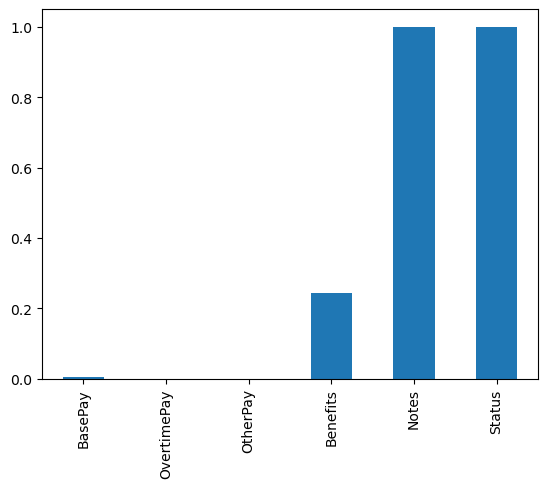

In [15]:
missing = df.isnull().sum()
missing = missing[missing > 0] / 148654
missing.plot.bar()

In [16]:
missing

BasePay        0.004097
OvertimePay    0.000027
OtherPay       0.000027
Benefits       0.243270
Notes          1.000000
Status         1.000000
dtype: float64

C:\Users\HP.Z.BOOK G3\AppData\Local\Temp\ipykernel_20216\3762546680.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

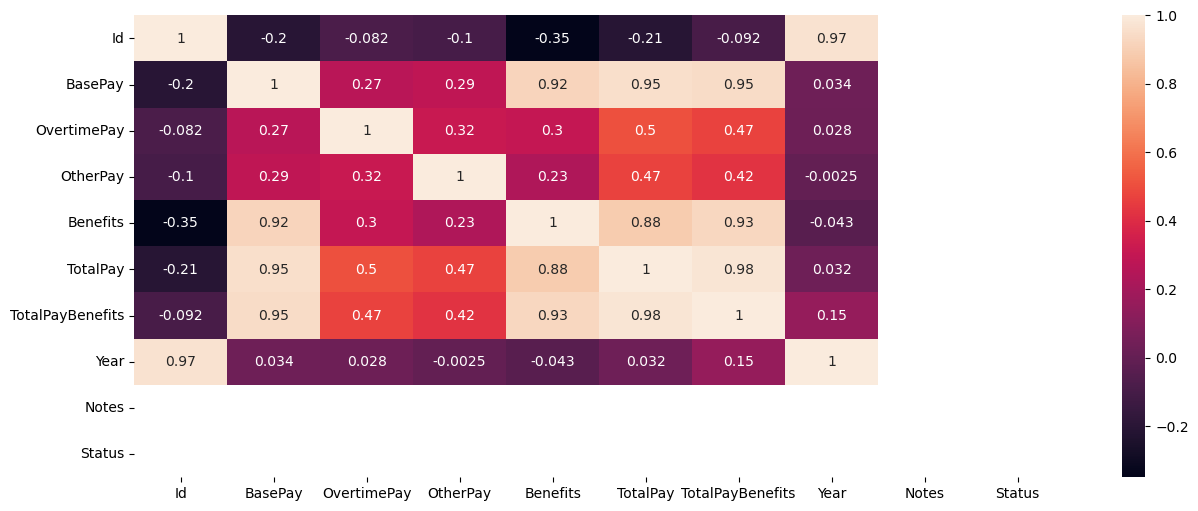

In [17]:
plt.figure(figsize=((15, 6)))
sns.heatmap(df.corr(), annot=True)

# drop "Status and Notes" 
 becouse all of the coloumn is null

In [18]:
df = df.drop(["Status", "Notes"], axis=1)

In [19]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


In [22]:
df[df == 0].count()

Id                      0
EmployeeName            0
JobTitle                0
BasePay              1298
OvertimePay         77321
OtherPay            41600
Benefits             1734
TotalPay              368
TotalPayBenefits       30
Year                    0
Agency                  0
dtype: int64

<Axes: xlabel='Benefits', ylabel='Count'>

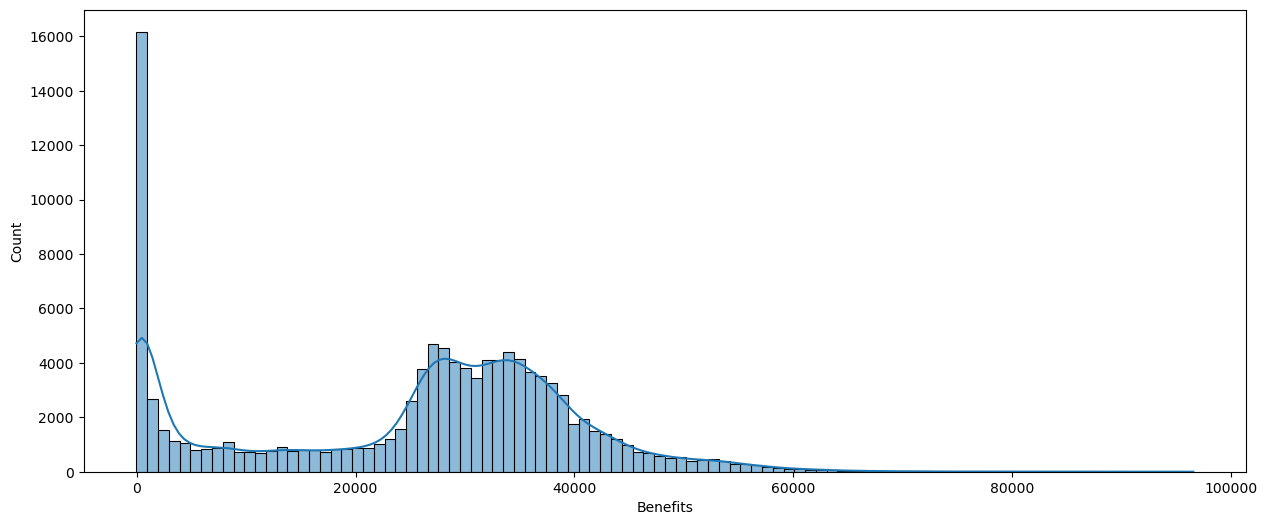

In [20]:
plt.figure(figsize=((15, 6)))
sns.histplot(df["Benefits"], kde=True)

we will delete  zero values of Benefits becouse there is small


we will delete  zero values of TotalPay becouse there is no empleyee didnt take salary

In [23]:
df = df[df["Benefits"] != 0]
df = df[df["TotalPay"] != 0]

In [24]:
df[df == 0].count()

Id                      0
EmployeeName            0
JobTitle                0
BasePay              1078
OvertimePay         75500
OtherPay            40482
Benefits                0
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [25]:
df["Benefits"] = np.where(df["Benefits"] > 80000, 80000, df["Benefits"])

<Axes: xlabel='Benefits', ylabel='Count'>

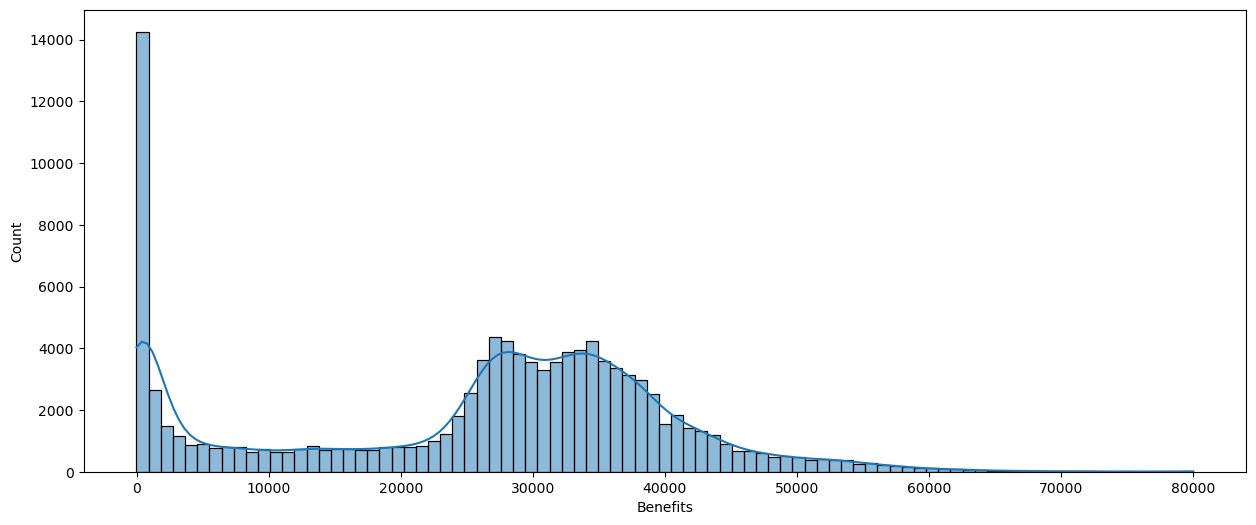

In [26]:
plt.figure(figsize=((15, 6)))
sns.histplot(df["Benefits"], kde=True)

<Axes: xlabel='OvertimePay', ylabel='Count'>

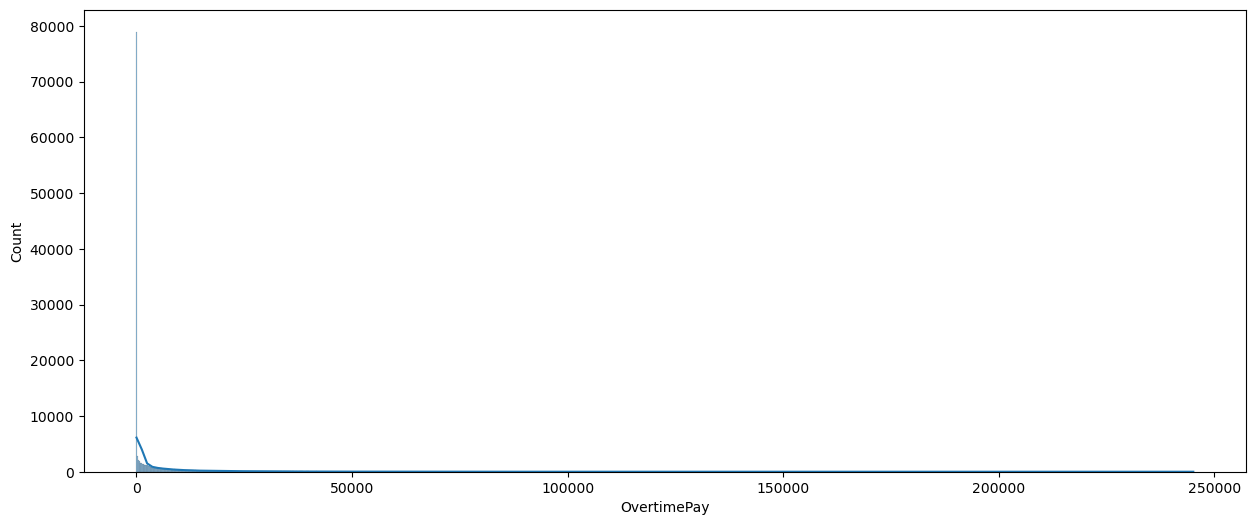

In [27]:
plt.figure(figsize=((15, 6)))
sns.histplot(df["OvertimePay"], kde=True)

<Axes: xlabel='OtherPay', ylabel='Count'>

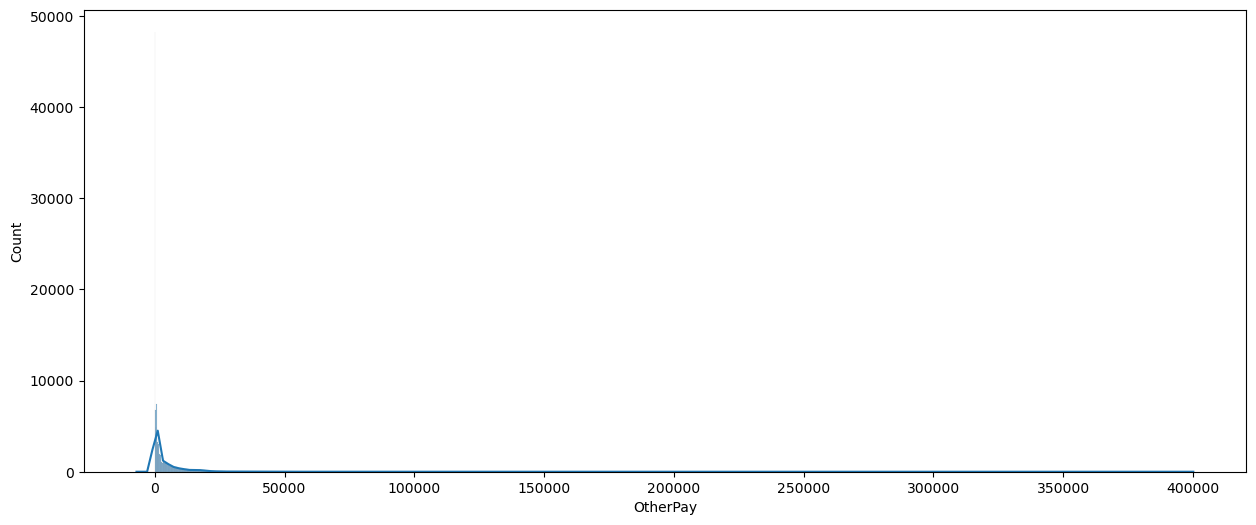

In [28]:
plt.figure(figsize=((15, 6)))
sns.histplot(df["OtherPay"], kde=True)

<Axes: xlabel='BasePay', ylabel='Count'>

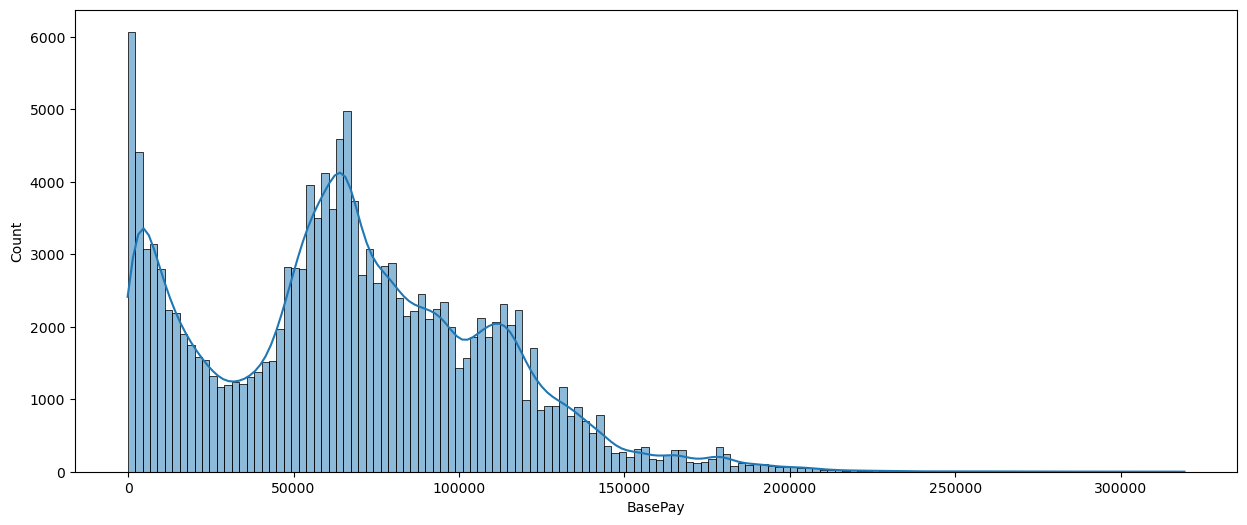

In [29]:
plt.figure(figsize=((15, 6)))
sns.histplot(df["BasePay"], kde=True)

In [30]:
df["BasePay"] = np.where(df["BasePay"] > 250000, 250000, df["BasePay"])

In [31]:
df["BasePay"] = np.where(df["BasePay"] == 0, df["BasePay"].mean(), df["BasePay"])

<Axes: xlabel='BasePay', ylabel='Count'>

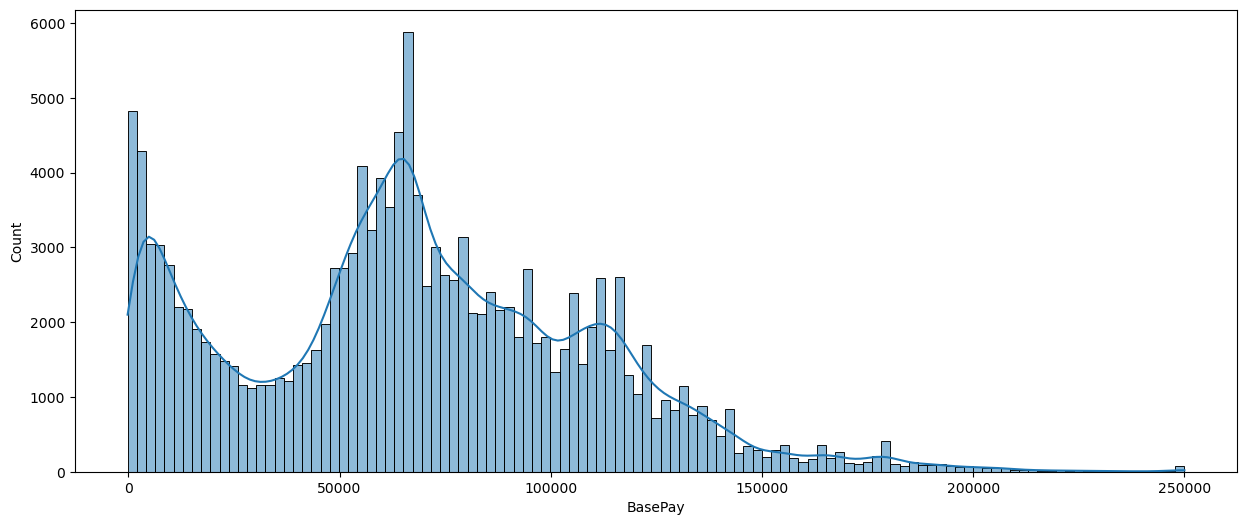

In [32]:
plt.figure(figsize=((15, 6)))
sns.histplot(df["BasePay"], kde=True)

<Axes: xlabel='TotalPay', ylabel='Count'>

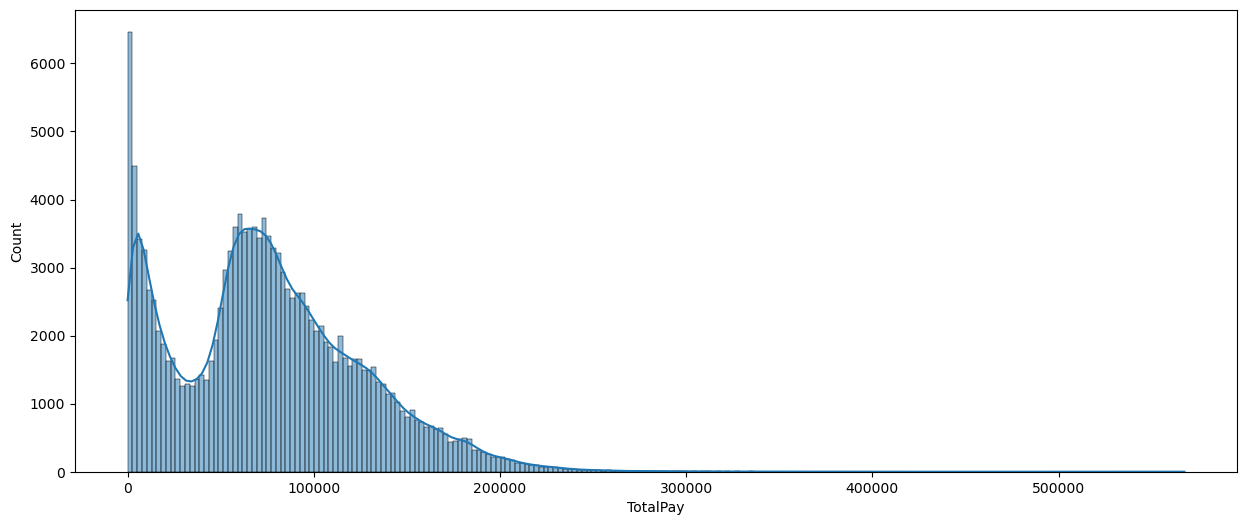

In [33]:
plt.figure(figsize=((15, 6)))
sns.histplot(df["TotalPay"], kde=True)

In [36]:
dept_counts = df["TotalPay"].value_counts().sum()
dept_counts

146575

In [41]:
job_title_counts = df["JobTitle"].value_counts()
job_title_counts

Transit Operator                         6976
Special Nurse                            4142
Registered Nurse                         3724
Public Svc Aide-Public Works             2481
TRANSIT OPERATOR                         2387
                                         ... 
PRINCIPAL INVESTIGATOR, TAX COLLECTOR       1
BUILDING SERVICES TECHNICIAN                1
TRIAL DELAY REDUCTION COORDINATOR           1
POWERHOUSE ELECTRICIAN SUPERVISOR II        1
Forensic Toxicologist Supervis              1
Name: JobTitle, Length: 2151, dtype: int64

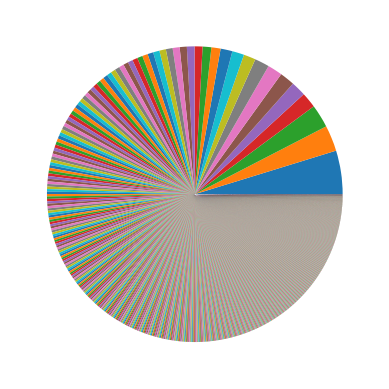

In [47]:
job_title_counts = df["JobTitle"].value_counts()
plt.pie(job_title_counts)
plt.show()

In [56]:
grouped_data = df.groupby("TotalPay")

In [57]:
average_salaries = df.groupby(["TotalPay"]).mean()
average_salaries

C:\Users\HP.Z.BOOK G3\AppData\Local\Temp\ipykernel_20216\3654862646.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_salaries = df.groupby(["TotalPay"]).mean()


,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year
TotalPay,,,,,,,
0.30,36156.0,66864.620594,0.00,0.30,NaN,0.30,2011.0
1.77,72925.0,66864.620594,0.00,1.77,0.14,1.91,2012.0
1.83,145930.0,66864.620594,0.00,1.83,4659.36,4661.19,2014.0
3.28,72924.0,66864.620594,0.00,3.28,0.88,4.16,2012.0
4.17,36155.0,66864.620594,0.00,4.17,NaN,4.17,2011.0
...,...,...,...,...,...,...,...
362844.66,36160.0,128808.870000,220909.48,13126.31,44430.12,407274.78,2012.0
390111.98,110533.0,250000.000000,10712.95,60563.54,80000.00,479652.21,2014.0
471952.64,110532.0,129150.010000,0.00,342802.63,38780.04,510732.68,2014.0


In [69]:
def statistic_inf(df):
    mean = df.mean()
    median = df.median()
    minimum = df.min()
    maximum = df.max()
    range_salary = maximum - minimum
    standerd_diviaton = df.std()
    print(
        "mean of salary is : ",
        mean,
        "\nmedian of salary is : ",
        median,
        "\nminimum of salary is : ",
        minimum,
        "\nmaximum of salary is : ",
        maximum,
        "\nRange of salaries:",
        range_salary,
        "\nstander_diviaton of salary is : ",
        standerd_diviaton,
    )

In [71]:
statistic_inf(grouped_data)

C:\Users\HP.Z.BOOK G3\AppData\Local\Temp\ipykernel_20216\694688538.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = df.mean()
C:\Users\HP.Z.BOOK G3\AppData\Local\Temp\ipykernel_20216\694688538.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = df.median()


TypeError: unsupported operand type(s) for -: 'str' and 'str'

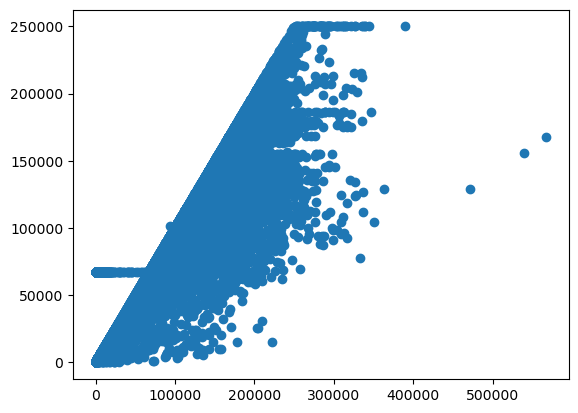

In [72]:
plt.scatter(df["TotalPay"], df["BasePay"])

plt.show()